## **Lectura 1: Flujo en redes como programas lineales** 

## Ruta mas corta. 

El problema de la ruta mas corta consiste en encontrar la ruta de menor costo entre un par de nodos en una red.

![](../Images/ruta_mas_corta_google.png)

#### Ejemplo Motivador:

Supongamos que eres un viajero que busca ir de la ciudad A a la ciudad E utilizando la red de carreteras existente. Dada la siguiente red con las distancias entre ciudades, encuentra la ruta más corta entre la ciudad A y la ciudad E.

```
A - B: 5 km
A - C: 7 km
B - C: 3 km
B - D: 4 km
C - D: 2 km
C - E: 6 km
D - E: 5 km
```



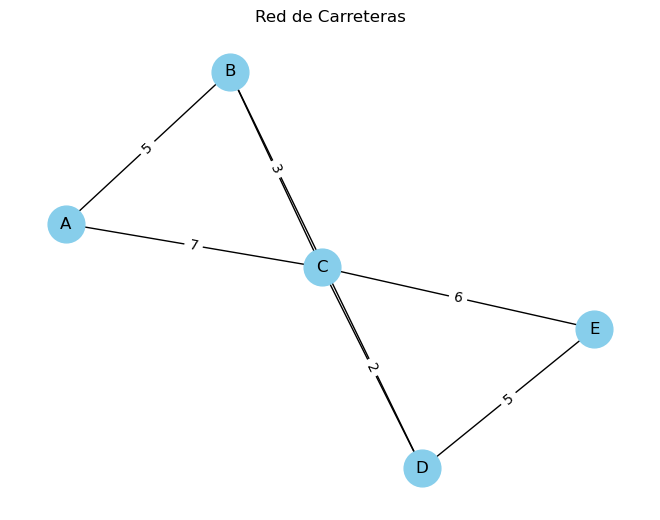

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


# Datos
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
costs = {(edges[i]): c for i, c in enumerate([5, 7, 3, 4, 2, 6, 5])}

# Crear el grafo
G = nx.Graph()
for edge, cost in costs.items():
    G.add_edge(edge[0], edge[1], weight=cost)

# Dibujar la instancia
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Red de Carreteras")
plt.show()

**Formulación del problema de optimización**


- **Variables de decisión**:
   $ x_{ij} $ : 1 si el camino entre ciudad $i$ y $j$ es tomado; 0 de lo contrario.

- **Función objetivo**:
   Minimizar $ \sum_{(i,j) \in A} c_{ij} x_{ij} $, 
      donde $c_{ij}$ es la distancia entre la ciudad $i$ y $j$.

- **Restricciones**:
  1. Debe salir de la ciudad A: $ \sum_{j|(A,j) \in A} x_{Aj} = 1 $
  2. Debe llegar a la ciudad E: $ \sum_{i|(i,E) \in A} x_{iE} = 1 $
  3. Balance de flujo para las ciudades intermedias: $\sum_{j|(i,j) \in A} x_{ij} - \sum_{k|(k,i) \in A} x_{ki} = 0 , \forall i$ que no sea A o E.



**Código en Gurobi**:


In [2]:
from gurobipy import Model, GRB
m = Model()

# Variables
x = m.addVars(edges, obj=costs, vtype=GRB.BINARY, name="x")

# Restricciones
m.addConstr(x.sum('A', '*') == 1, "Salida desde A")
m.addConstr(x.sum('*', 'E') == 1, "Llegada a E")
for i in nodes:
    if i not in ['A', 'E']:
        m.addConstr(x.sum(i, '*') - x.sum('*', i) == 0, f"Balance en {i}")

# Optimización
m.optimize()

# Imprimir solución
if m.status == GRB.OPTIMAL:
    for edge in edges:
        if x[edge].x > 0.5:
            print(f"Ruta desde {edge[0]} a {edge[1]}")

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 5 rows, 7 columns and 14 nonzeros
Model fingerprint: 0xa06d13ef
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 13 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.300000000000e+01, best bound 1.300000000000e+01, gap 0.0000%
Ruta desde A a C
Ruta desde C a E


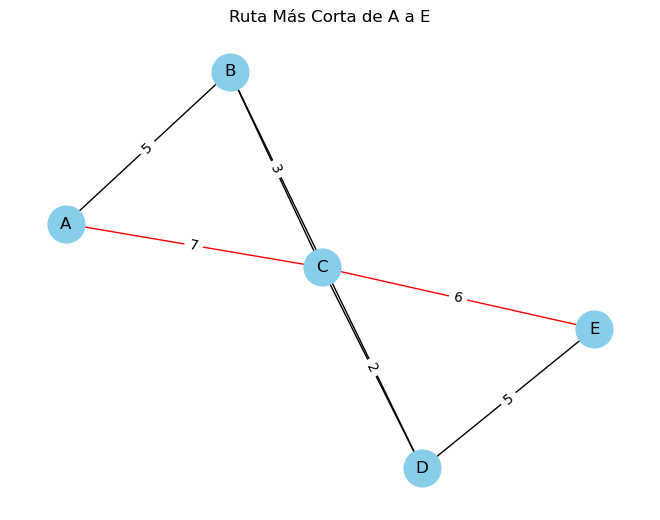

In [3]:
# Graficar la solución
edges_taken = [edge for edge in edges if x[edge].x > 0.5]

edge_colors = ['red' if edge in edges_taken else 'black' for edge in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color=edge_colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Ruta Más Corta de A a E")
plt.show()

**Ejercicio** 

Ahora intenta resolver la siguiente instancia: 

```
A -> B: 5 km

A -> C: 7 km

B -> C: 3 km

B -> D: 4 km

B -> F: 6 km

C -> D: 2 km

C -> E: 8 km

D -> E: 7 km

D -> F: 5 km

E -> G: 9 km

F -> G: 3 km

F -> H: 7 km

G -> H: 4 km

H -> I: 6 km

E -> I: 11 km
```

Cual es la ruta más corta entre A y I?

In [4]:
# Pon tu código aquí


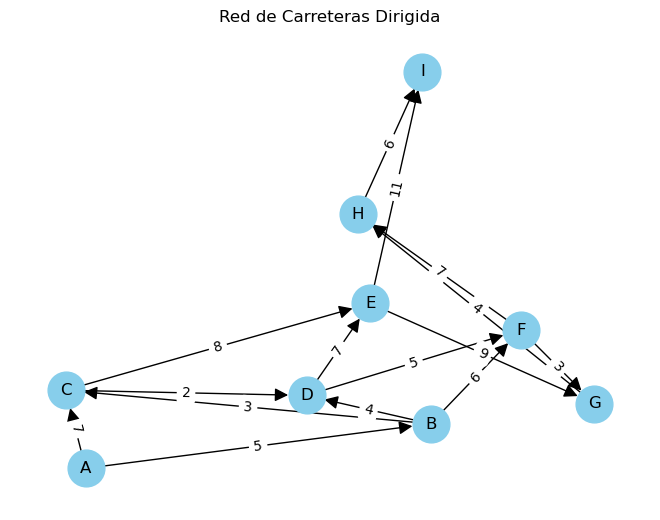

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 9 rows, 15 columns and 30 nonzeros
Model fingerprint: 0x8dbed9f0
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 28.0000000
Presolve removed 9 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 24 28 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.400000000000e+01, best bound 2.400000000000e+01, gap 0.0000%


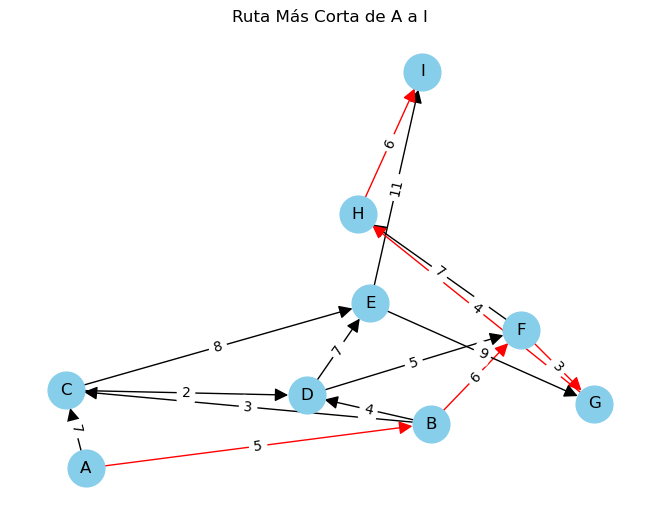

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import Model, GRB

# Datos
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H'), ('G', 'H'), ('H', 'I'), ('E', 'I')]
costs = {(edges[i]): c for i, c in enumerate([5, 7, 3, 4, 6, 2, 8, 7, 5, 9, 3, 7, 4, 6, 11])}

# Crear el grafo dirigido
G = nx.DiGraph()
for edge, cost in costs.items():
    G.add_edge(edge[0], edge[1], weight=cost)

# Dibujar la instancia
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Red de Carreteras Dirigida")
plt.show()

# Modelo en Gurobi
m = Model()

# Variables
x = m.addVars(edges, obj=costs, vtype=GRB.BINARY, name="x")

# Restricciones
m.addConstr(x.sum('A', '*') == 1, "Salida desde A")
m.addConstr(x.sum('*', 'I') == 1, "Llegada a I")
for i in nodes:
    if i not in ['A', 'I']:
        m.addConstr(x.sum(i, '*') - x.sum('*', i) == 0, f"Balance en {i}")

# Optimización
m.optimize()

# Graficar la solución
edges_taken = [edge for edge in edges if x[edge].x > 0.5]

edge_colors = ['red' if edge in edges_taken else 'black' for edge in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color=edge_colors, arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Ruta Más Corta de A a I")
plt.show()


## Problema de Flujo Máximo

El problema de flujo máximo busca encontrar el mayor flujo posible que puede ser enviado de un nodo fuente a un nodo destino en una red dada.

#### Ejemplo Motivador:

Imaginemos que tenemos una red de tuberías que conecta diferentes puntos (nodos). Cada tubería (arista) tiene una capacidad de flujo determinada. El objetivo es encontrar el flujo máximo que puede ser transportado desde un punto de origen (fuente) hasta un punto final (sumidero) sin exceder las capacidades de las tuberías.

#### Formulación Matemática:

Dado un grafo $ G = (V, E)$  con un conjunto de nodos $ V $ y un conjunto de aristas $ E $. Cada arista $(i, j)$ tiene una capacidad $c_{ij}$. Buscamos el flujo $f_{ij}$ tal que:

**Variables**:
- $f_{ij}$ : Flujo en la arista $(i, j)$.

**Función Objetivo**:

Maximizar $ \sum_{j \in V} f_{sj} $ (Maximizar el flujo saliente del nodo fuente).

**Restricciones**:

1. **Conservación del Flujo** (para todos los nodos excepto la fuente y el sumidero): 

   $\sum_{j \in V} f_{ji} - \sum_{j \in V} f_{ij} = 0 $

2. **Restricción de Fuente**:
   
   $ \sum_{j \in V} f_{sj} - \sum_{j \in V} f_{js} \geq 0 $

3. **Restricción de Sumidero**:

   $ \sum_{j \in V} f_{jt} - \sum_{j \in V} f_{tj} \leq 0 $   
   
4. **Capacidad de las Aristas**: 

   $ 0 \leq f_{ij} \leq c_{ij} $ para todo $(i, j) \in E $



**Intenta plantear una formulación alternativa**

- Escribe tu modelo aquí


#### Ejemplo motivador :

Consideremos el siguiente grafo dirigido:

```
A (Fuente) -> B: 20
A -> C: 30
B -> C: 10
B -> D: 30
C -> D: 20
C -> E (Sumidero): 10
D -> E: 40
```

Queremos encontrar el flujo máximo desde A hasta E.



**Código en python**


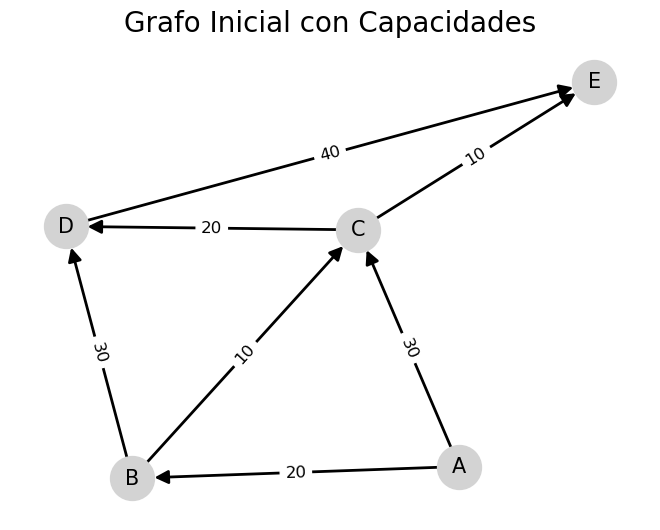

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import Model, GRB

# Datos
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
capacities = {(edges[i]): c for i, c in enumerate([20, 30, 10, 30, 20, 10, 40])}

# Crear el grafo dirigido con NetworkX
G = nx.DiGraph()
for edge, capacity in capacities.items():
    G.add_edge(edge[0], edge[1], capacity=capacity)

# Visualización con NetworkX - Grafo Inicial
pos = nx.spring_layout(G)
edge_labels = {(i, j): f"{G[i][j]['capacity']}" for i, j in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightgray', arrowsize=20, width=2, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Grafo Inicial con Capacidades", size=20)
plt.show()


In [7]:
# Modelo en Gurobi
m = Model()

# Variables
flow = m.addVars(edges, ub=capacities, name="flow")

# Restricciones
for i in nodes:
    if i == 'A':  # Fuente
        m.addConstr(flow.sum(i, '*') - flow.sum('*', i) >= 0, f"Source_{i}")
    elif i == 'E':  # Sumidero
        m.addConstr(flow.sum(i, '*') - flow.sum('*', i) <= 0, f"Sink_{i}")
    else:  # Conservación del flujo
        m.addConstr(flow.sum(i, '*') - flow.sum('*', i) == 0, f"FlowConserv_{i}")

# Función objetivo
m.setObjective(flow.sum('A', '*') - flow.sum('*', 'A'), GRB.MAXIMIZE)

# Optimizar
m.optimize()



Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 5 rows, 7 columns and 14 nonzeros
Model fingerprint: 0x59b4cac7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+01, 4e+01]
  RHS range        [0e+00, 0e+00]
Presolve removed 3 rows and 4 columns
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+01   0.000000e+00   0.000000e+00      0s
       0    5.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.000000000e+01


In [8]:

# Imprimir solución
print("\nFlujos óptimos en cada arista:")
for edge, variable in flow.items():
    print(f"Flujo desde {edge[0]} hacia {edge[1]}: {variable.x}/{capacities[edge]}")


Flujos óptimos en cada arista:
Flujo desde A hacia B: 20.0/20
Flujo desde A hacia C: 30.0/30
Flujo desde B hacia C: 0.0/10
Flujo desde B hacia D: 20.0/30
Flujo desde C hacia D: 20.0/20
Flujo desde C hacia E: 10.0/10
Flujo desde D hacia E: 40.0/40


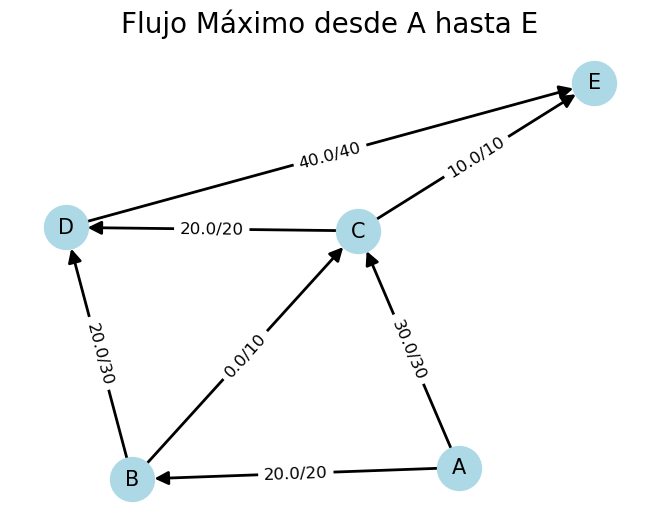

In [9]:
# Actualizar el grafo con los flujos
for edge, variable in flow.items():
    G[edge[0]][edge[1]]['flow'] = variable.x

# Visualización con NetworkX - Grafo con Flujos
edge_labels_with_flow = {(i, j): f"{G[i][j]['flow']}/{G[i][j]['capacity']}" for i, j in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', arrowsize=20, width=2, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_with_flow, font_size=12)

plt.title("Flujo Máximo desde A hasta E", size=20)
plt.show()

## Ejercicio

**Problema de Evacuación de Emergencia**

La ciudad de Industropolis, una metrópoli próspera situada cerca de un gran río, está en grave peligro debido a la inminente ruptura de un dique cercano. Las autoridades locales han decidido llevar a cabo una evacuación masiva para garantizar la seguridad de sus habitantes. Sin embargo, la operación de evacuación es compleja debido a la estructura de las carreteras de la ciudad y a las limitaciones de capacidad.

Industropolis cuenta con 3 puntos de evacuación estratégicos a los que llamaremos E1, E2 y E3. Además, hay 3 zonas seguras fuera de la ciudad donde las personas pueden ser llevadas para su seguridad, denominadas Z1, Z2 y Z3. 

La red de carreteras entre los puntos de evacuación y las zonas seguras se puede representar como un conjunto de rutas. Cada ruta tiene una capacidad máxima, que representa el número de personas que puede ser evacuado por esa ruta en una hora. Algunas rutas conectan puntos de evacuación con zonas seguras, mientras que otras conectan diferentes puntos de evacuación entre sí, representando intersecciones o vías principales dentro de la ciudad.

Los datos de las capacidades de las rutas se detallan a continuación:

**Rutas y Capacidades:**

- $E1 \rightarrow N1$: 4000 personas/hora
- $E2 \rightarrow N1$: 3000 personas/hora
- $E2 \rightarrow N2$: 2000 personas/hora
- $E3 \rightarrow N3$: 4500 personas/hora
- $N1 \rightarrow N3$: 2500 personas/hora
- $N1 \rightarrow N4$: 3500 personas/hora
- $N2 \rightarrow N4$: 3000 personas/hora
- $N3 \rightarrow Z1$: 4000 personas/hora
- $N3 \rightarrow Z2$: 1500 personas/hora
- $N4 \rightarrow Z2$: 3000 personas/hora
- $N4 \rightarrow Z3$: 2500 personas/hora

Su tarea es determinar:

1. ¿Cuál es el número máximo de personas que pueden ser evacuadas de Industropolis en una hora?
2. ¿Qué ruta o rutas representan los cuellos de botella en esta operación de evacuación?
3. Si se tuviera la opción de aumentar la capacidad de una sola ruta en 1000 personas/hora, ¿cuál debería ser para maximizar aún más la evacuación?

Se espera que presenten una metodología clara para la resolución, utilizando técnicas de optimización y herramientas de programación lineal. La solución debe incluir una representación visual de la red de carreteras y las rutas de evacuación propuestas, así como un análisis detallado de los resultados y las recomendaciones para las autoridades.


In [10]:

import gurobipy as gp
from gurobipy import GRB

# Datos
nodes = ['E1', 'E2', 'E3', 'N1', 'N2', 'N3', 'N4', 'Z1', 'Z2', 'Z3']
edges = [('E1', 'N1'), ('E2', 'N1'), ('E2', 'N2'), ('E3', 'N3'), ('N1', 'N3'), ('N1', 'N4'), 
         ('N2', 'N4'), ('N3', 'Z1'), ('N3', 'Z2'), ('N4', 'Z2'), ('N4', 'Z3')]
capacities = {(edges[i]): c for i, c in enumerate([4000, 3000, 2000, 4500, 2500, 3500, 3000, 4000, 1500, 3000, 2500])}

# Crear el modelo
m = gp.Model("Evacuacion_Multiple")

# Variables
flow = m.addVars(edges, obj=-1, ub=capacities, name="flow")

# Restricciones de conservación de flujo
for node in nodes:
    total_in = sum(flow[edge] for edge in edges if edge[1] == node)
    total_out = sum(flow[edge] for edge in edges if edge[0] == node)

    # Nodos fuente
    if node in ['E1', 'E2', 'E3']:
        m.addConstr(total_out - total_in == sum(flow[edge] for edge in edges if edge[0] == node))
    # Nodos sumidero
    elif node in ['Z1', 'Z2', 'Z3']:
        m.addConstr(total_in - total_out == sum(flow[edge] for edge in edges if edge[1] == node))
    # Otros nodos
    else:
        m.addConstr(total_out - total_in == 0)

# Optimizar
m.optimize()



Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 10 rows, 11 columns and 14 nonzeros
Model fingerprint: 0xfe3c3411
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+03, 5e+03]
  RHS range        [0e+00, 0e+00]
Presolve removed 7 rows and 1 columns
Presolve time: 0.00s
Presolved: 3 rows, 10 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.2500000e+04   2.500000e+03   0.000000e+00      0s
       2   -3.0000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -3.000000000e+04


In [11]:
# Imprimir solución
if m.status == GRB.OPTIMAL:
    print(f"Maximo numero de personas que pueden ser evacuadas en una hora: {-m.objVal}")
    print("\nFlujos en las rutas:")
    for edge, var in flow.items():
        print(f"Desde {edge[0]} a {edge[1]}: {var.x} personas")

Maximo numero de personas que pueden ser evacuadas en una hora: 30000.0

Flujos en las rutas:
Desde E1 a N1: 3000.0 personas
Desde E2 a N1: 3000.0 personas
Desde E2 a N2: 2000.0 personas
Desde E3 a N3: 3000.0 personas
Desde N1 a N3: 2500.0 personas
Desde N1 a N4: 3500.0 personas
Desde N2 a N4: 2000.0 personas
Desde N3 a Z1: 4000.0 personas
Desde N3 a Z2: 1500.0 personas
Desde N4 a Z2: 3000.0 personas
Desde N4 a Z3: 2500.0 personas


**Formulación del problema**

Por supuesto, la formulación matemática para el problema de evacuación con múltiples fuentes y sumideros es la siguiente:

### Conjuntos:
- $ E $ : Conjunto de puntos de evacuación (fuentes)
- $ Z $ : Conjunto de zonas seguras (sumideros)
- $ N $ : Conjunto de nodos intermedios
- $ R $ : Conjunto de rutas (arcos) entre nodos

### Parámetros:
- $ c_{ij} $ : Capacidad de personas por hora que pueden ser evacuadas desde el nodo $ i $ al nodo $ j $

### Variables de decisión:
- $ f_{ij} $ : Flujo de personas por hora evacuadas desde el nodo $ i $ al nodo $ j $

### Modelo matemático:

**Función Objetivo:**  

$ \text{max} \text{ F} $

**Sujeto a las restricciones:**

1. **Restricciones de capacidad:** El flujo en una ruta no debe superar su capacidad.

$f_{ij} \leq c_{ij} \quad \forall (i, j) \in R $

2. **Restricciones de conservación de flujo:** La cantidad de personas que entran y salen de un nodo deben ser iguales, excepto en los puntos de evacuación y zonas seguras.

$ \sum_{j|(i,j) \in R} f_{ij} - \sum_{j|(j,i) \in R} f_{ji} = 0 \quad \forall i \in N $

3. **Restricciones para puntos de evacuación:** La cantidad de personas que salen de un punto de evacuación es igual al flujo total de ese punto.

$ \sum_{j|(i,j) \in R} f_{ij} = F \quad \forall i \in E $

4. **Restricciones para zonas seguras:** La cantidad de personas que llegan a una zona segura es igual al flujo total hacia esa zona.

$\sum_{j|(j,i) \in R} f_{ji} = F  \quad \forall i \in Z $

Donde:
- $ i $ y $ j $ son nodos cualesquiera en la red.
- La primera suma en las restricciones de conservación de flujo representa el flujo total saliente del nodo $ i $ y la segunda suma representa el flujo total entrante al nodo $ i $.

Esta formulación garantiza que se maximice el número de personas evacuadas teniendo en cuenta las capacidades de las rutas y asegurando un flujo correcto a través de la red.

## Flujo de Costo Mínimo (Min-Cost Flow)

El problema del flujo de costo mínimo (a menudo llamado simplemente "Min-Cost Flow") es un problema fundamental de optimización en redes que combina aspectos de ambos, el problema de ruta más corta y el problema de flujo máximo. Su objetivo es encontrar el flujo de menor costo posible que satisface las demandas y restricciones de suministro en una red.

### Enunciado:

Supongamos que una empresa de transporte tiene bodegas en tres ciudades (A, B y C) y necesita enviar productos a tiendas en otras tres ciudades (X, Y y Z). Las bodegas tienen una cierta cantidad de productos y las tiendas tienen una demanda específica. Además, el costo de enviar una unidad de producto de una ciudad a otra es conocido. El objetivo es determinar la cantidad de productos que deben ser enviados desde cada bodega a cada tienda de manera que se minimice el costo total de transporte y se satisfaga la demanda de cada tienda.

- Oferta en bodegas:
  - A: 20
  - B: 30
  - C: 25
  
- Demanda en tiendas:
  - X: 10
  - Y: 25
  - Z: 40
  
- Costo de transporte (por unidad de producto):

  |    | X | Y | Z |
  |----|---|---|---|
  | A  | 8 | 6 | 10|
  | B  | 9 | 5 | 9 |
  | C  | 11| 7 | 7 |

### Formulación Matemática:

- Conjuntos:
  - $I$: Conjunto de bodegas, $I = \{A, B, C\}$.
  - $J$: Conjunto de tiendas, $J = \{X, Y, Z\}$.

- Parámetros:
  - $ s_i $: Oferta de la bodega $i \in I$.
  - $ d_j $: Demanda de la tienda $j \in J$.
  - $ c_{ij} $: Costo de enviar una unidad de producto de la bodega $i$ a la tienda $j$.

- Variables:
  - $ x_{ij} $: Cantidad de productos enviados de la bodega $i$ a la tienda $j$.

**Función objetivo**:

Minimizar $ \sum_{i \in I} \sum_{j \in J} c_{ij} x_{ij} $

**Restricciones**:

1. Oferta en bodegas:
$$ \sum_{j \in J} x_{ij} \leq s_i \quad \forall i \in I $$

2. Demanda en tiendas:
$$ \sum_{i \in I} x_{ij} = d_j \quad \forall j \in J $$

3. No negatividad:
$$ x_{ij} \geq 0 \quad \forall i \in I, \forall j \in J $$


**Código en Python:**


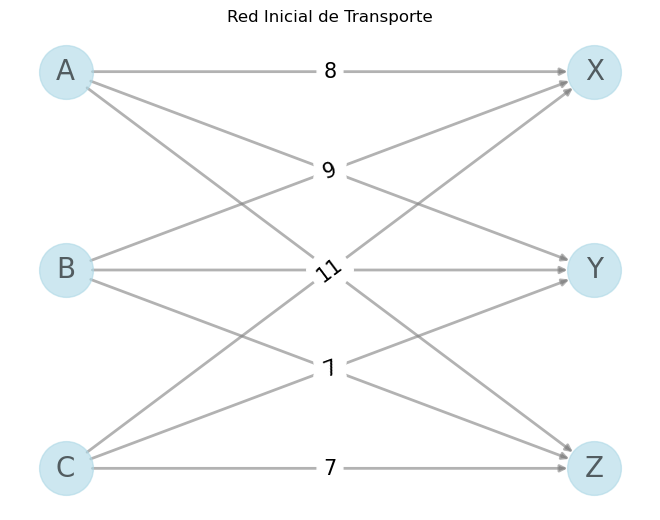

In [12]:
from gurobipy import Model, GRB
import networkx as nx
import matplotlib.pyplot as plt

# Data
bodegas = ['A', 'B', 'C']
tiendas = ['X', 'Y', 'Z']
oferta = {'A': 20, 'B': 30, 'C': 25}
demanda = {'X': 10, 'Y': 25, 'Z': 40}
costos = {
    ('A', 'X'): 8, ('A', 'Y'): 6, ('A', 'Z'): 10,
    ('B', 'X'): 9, ('B', 'Y'): 5, ('B', 'Z'): 9,
    ('C', 'X'): 11, ('C', 'Y'): 7, ('C', 'Z'): 7
}

# Creación del grafo
G = nx.DiGraph()

# Adición de nodos
for bodega in bodegas:
    G.add_node(bodega, demand=-oferta[bodega])  # Las bodegas tienen oferta negativa (porque suministran)

for tienda in tiendas:
    G.add_node(tienda, demand=demanda[tienda])

# Adición de aristas con costos
for (bodega, tienda), costo in costos.items():
    G.add_edge(bodega, tienda, weight=costo)

# Dibujo del grafo
pos = {
    'A': (0, 1),
    'B': (0, 0),
    'C': (0, -1),
    'X': (1, 1),
    'Y': (1, 0),
    'Z': (1, -1)
}
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=20, edge_color='gray', width=2, alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)
plt.title("Red Inicial de Transporte")
plt.show()


In [13]:
# Modelo
m = Model("Flujo de costo mínimo")

# Variables
x = m.addVars(bodegas, tiendas, name="x")

# Función objetivo
m.setObjective(x.prod(costos), GRB.MINIMIZE)

# Restricciones
for i in bodegas:
    m.addConstr(sum(x[i,j] for j in tiendas) <= oferta[i], name=f"Oferta_{i}")

for j in tiendas:
    m.addConstr(sum(x[i,j] for i in bodegas) == demanda[j], name=f"Demanda_{j}")

# Resolver
m.optimize()



Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6 rows, 9 columns and 18 nonzeros
Model fingerprint: 0x2446776e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Presolve time: 0.00s
Presolved: 6 rows, 9 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8500000e+02   1.500000e+01   0.000000e+00      0s
       2    5.2500000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.250000000e+02


In [14]:
# Resultados
for i, j in x:
    print(f"Enviar {x[i,j].x} unidades de bodega {i} a tienda {j}")

Enviar 10.0 unidades de bodega A a tienda X
Enviar 10.0 unidades de bodega A a tienda Y
Enviar 0.0 unidades de bodega A a tienda Z
Enviar 0.0 unidades de bodega B a tienda X
Enviar 15.0 unidades de bodega B a tienda Y
Enviar 15.0 unidades de bodega B a tienda Z
Enviar 0.0 unidades de bodega C a tienda X
Enviar 0.0 unidades de bodega C a tienda Y
Enviar 25.0 unidades de bodega C a tienda Z


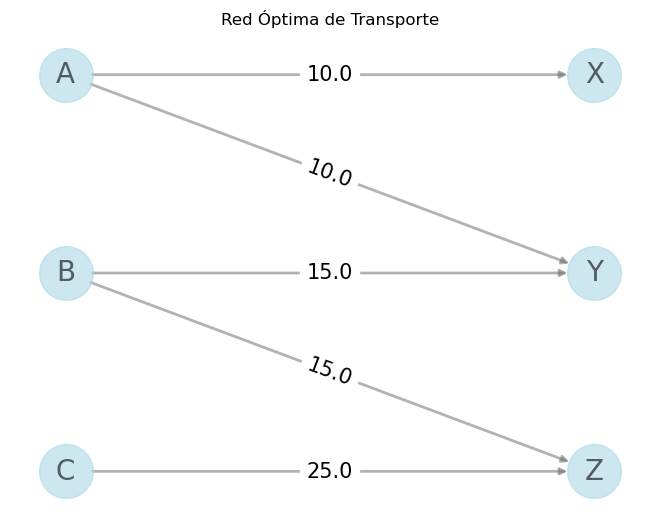

In [15]:
# Creación del grafo basado en la solución
G_sol = nx.DiGraph()

for i, j in x:
    cantidad = x[i, j].x
    if cantidad > 0:
        G_sol.add_edge(i, j, weight=cantidad)

# Dibujo del grafo
pos = {
    'A': (0, 1),
    'B': (0, 0),
    'C': (0, -1),
    'X': (1, 1),
    'Y': (1, 0),
    'Z': (1, -1)
}
edge_labels = {(i, j): G_sol[i][j]['weight'] for i, j in G_sol.edges()}

nx.draw(G_sol, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=20, edge_color='gray', width=2, alpha=0.6)
nx.draw_networkx_edge_labels(G_sol, pos, edge_labels=edge_labels, font_size=15)
plt.title("Red Óptima de Transporte")
plt.show()

**Enunciado:**

Se busca diseñar una red de distribución para transportar mercancías entre bodegas, distribuidores y clientes, minimizando el costo total de transporte. Las ubicaciones y detalles asociados son los siguientes:

**Bodegas:** 

- Bodega A tiene una oferta de 40 unidades.
- Bodega B tiene una oferta de 50 unidades.
- Bodega C tiene una oferta de 45 unidades.

**Distribuidores:** 

- Distribuidor D1 y D2 no tienen una demanda ni oferta inicial; actúan como puntos intermedios de transbordo.

**Clientes:** 

- Cliente X tiene una demanda de 40 unidades.
- Cliente Y tiene una demanda de 50 unidades.
- Cliente Z tiene una demanda de 45 unidades.

**Costos y capacidades de transporte:**

| De/Para | Costo por Unidad | Capacidad Máxima |
|---------|------------------|------------------|
| A-D1    | 5                | 40               |
| A-D2    | 6                | 40               |
| B-D1    | 7                | 45               |
| B-D2    | 6                | 40               |
| C-D1    | 8                | 40               |
| C-D2    | 7                | 45               |
| D1-X    | 6                | 40               |
| D1-Y    | 7                | 40               |
| D1-Z    | 9                | 40               |
| D2-X    | 7                | 45               |
| D2-Y    | 5                | 45               |
| D2-Z    | 6                | 45               |

**Objetivo:** 

Determine la cantidad de mercancía que debe ser transportada en cada ruta para satisfacer las demandas de los clientes al menor costo posible, respetando las capacidades máximas de cada ruta y las ofertas disponibles en las bodegas.



**Modelo Matemático**

**Conjuntos:**

$ N $: Conjunto de nodos (bodegas, centros de distribución y tiendas) = {A, B, C, D1, D2, X, Y, Z}.

$ A $: Conjunto de arcos entre nodos = {(i, j) : i, j \in N}.

**Parámetros:**

$ c_{ij} $: Costo de enviar una unidad de producto del nodo $ i $ al nodo $ j $.

$ u_{ij} $: Capacidad máxima de producto que se puede enviar del nodo $ i $ al nodo $ j $.

$ b_i $: Balance neto de productos en el nodo $ i $.

**Variables de Decisión:**

$ x_{ij} $: Cantidad de producto a enviar del nodo $ i $ al nodo $ j $.

**Función Objetivo:**

Minimizar el costo total de transporte:

$$ \min Z = \sum_{(i,j) \in A} c_{ij} x_{ij} $$

**Restricciones:**

1. Conservación de flujo en cada nodo:

$$ \sum_{j \in N|(i,j) \in A} x_{ij} - \sum_{j \in N|(j,i) \in A} x_{ji} = b_i \quad \forall i \in N $$

2. Respetar capacidades:

$$ x_{ij} \leq u_{ij} \quad \forall (i,j) \in A $$

3. Las variables de decisión son no negativas:

$$ x_{ij} \geq 0 \quad \forall (i,j) \in A $$





**Código en Python**


In [16]:
from gurobipy import Model, GRB

# Data
nodos = ['A', 'B', 'C', 'D1', 'D2', 'X', 'Y', 'Z']
arcos = [('A', 'D1'), ('A', 'D2'), 
         ('B', 'D1'), ('B', 'D2'), 
         ('C', 'D1'), ('C', 'D2'), 
         ('D1', 'X'), ('D1', 'Y'), ('D1', 'Z'), 
         ('D2', 'X'), ('D2', 'Y'), ('D2', 'Z')]

balance = {'A': 40, 'B': 50, 'C': 45, 'D1': 0, 'D2': 0, 'X': -40, 'Y': -50, 'Z': -45}

costos = {('A', 'D1'): 5, ('A', 'D2'): 6,
          ('B', 'D1'): 7, ('B', 'D2'): 6,
          ('C', 'D1'): 8, ('C', 'D2'): 7,
          ('D1', 'X'): 6, ('D1', 'Y'): 7, ('D1', 'Z'): 9,
          ('D2', 'X'): 7, ('D2', 'Y'): 5, ('D2', 'Z'): 6}

capacidades = {('A', 'D1'): 40, ('A', 'D2'): 40,
               ('B', 'D1'): 45, ('B', 'D2'): 40,
               ('C', 'D1'): 40, ('C', 'D2'): 45,
               ('D1', 'X'): 40, ('D1', 'Y'): 40, ('D1', 'Z'): 40,
               ('D2', 'X'): 45, ('D2', 'Y'): 45, ('D2', 'Z'): 45}

# Modelo
m = Model("Flujo de costo mínimo con conservación de flujo y capacidades")

# Variables
x = m.addVars(arcos, name="x", ub=capacidades)

# Función objetivo
m.setObjective(x.prod(costos), GRB.MINIMIZE)

# Restricciones
for i in nodos:
    m.addConstr(sum(x[i,j] for j in nodos if (i,j) in arcos) - 
                sum(x[j,i] for j in nodos if (j,i) in arcos) == balance[i], name=f"Conservacion_{i}")


# Resolver
m.optimize()

if m.status == GRB.INFEASIBLE:
    print("El modelo es infactible. Calculando el IIS...")
    m.computeIIS()
    m.write("model.ilp")
    print("Se ha escrito el IIS en el archivo 'model.ilp'. Revíselo para más detalles.")
elif m.status == GRB.OPTIMAL:
    for i, j in arcos:
        print(f"Enviar {x[i,j].x} unidades de {i} a {j}")
        print(f"Costo total: {m.objVal}")

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1265U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x02763b84
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 9e+00]
  Bounds range     [4e+01, 5e+01]
  RHS range        [4e+01, 5e+01]
Presolve removed 6 rows and 6 columns
Presolve time: 0.02s
Presolved: 2 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5950000e+03   1.000000e+01   0.000000e+00      0s
       1    1.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.600000000e+03
Enviar 35.0 unidades de A a D1
Costo total: 1600.0
Enviar 5.0 unidades de A a D2
Costo total: 1600.0
Enviar 10.0 unidades de B a D1
Costo total: 16

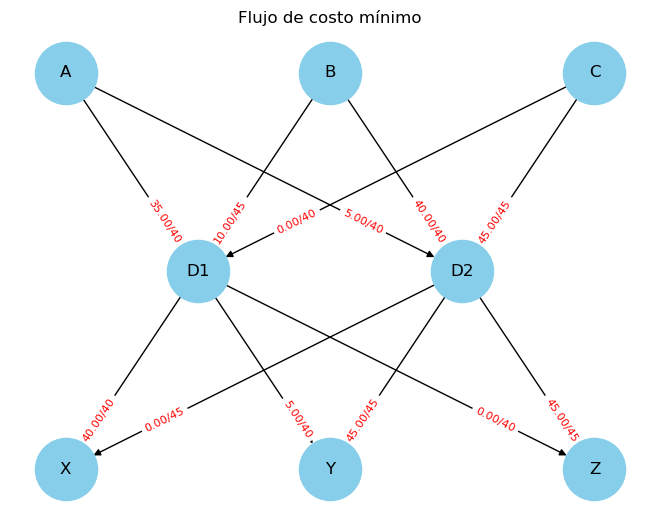

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos al grafo
for nodo in nodos:
    G.add_node(nodo)

# Añadir arcos al grafo con sus capacidades y flujos
for i, j in arcos:
    G.add_edge(i, j, capacity=capacidades[(i,j)], flow=x[i,j].x)

# Posiciones fijas para los nodos
posiciones_fijas = {
    'A': (0, 2),
    'B': (1, 2),
    'C': (2, 2),
    'D1': (0.5, 1),
    'D2': (1.5, 1),
    'X': (0, 0),
    'Y': (1, 0),
    'Z': (2, 0)
}

# Dibujar el grafo con posiciones fijas
nx.draw(G, pos=posiciones_fijas, with_labels=True, node_size=2000, node_color="skyblue")

# Etiquetas de arcos con flujos y capacidades
edge_labels = {(i, j): f'{G[i][j]["flow"]:.2f}/{G[i][j]["capacity"]}' for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=posiciones_fijas, edge_labels=edge_labels, font_size=8, label_pos=0.25, font_color="red")

plt.title("Flujo de costo mínimo")
plt.show()
